<a href="https://colab.research.google.com/github/andidprastyo/PCVK_Ganjil_2023/blob/main/week%20-%2007/tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet 7 - Filtering Spasial

Nama : Andi Dwi Prastyo <br>
NIM : 2141720046 <br>
Absen : 06 <br>
Kelas : TI-3H <br>

### Import Libraries

In [34]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

### Histogram Equalization

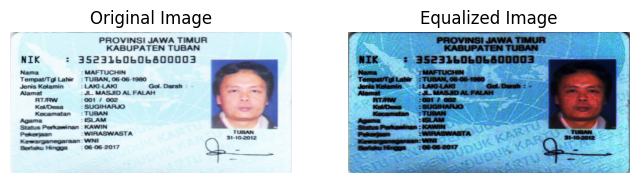

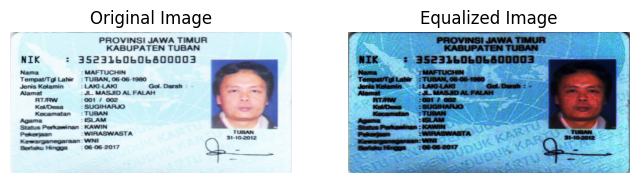

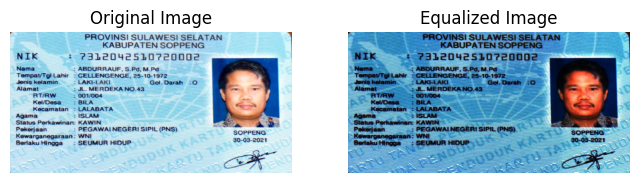

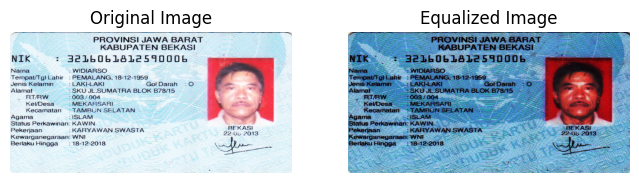

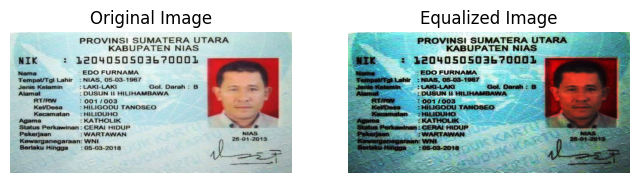

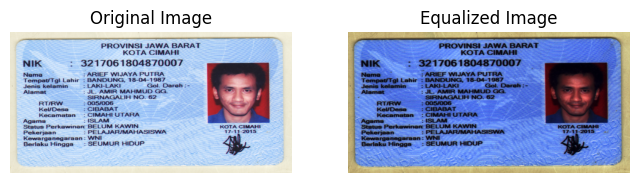

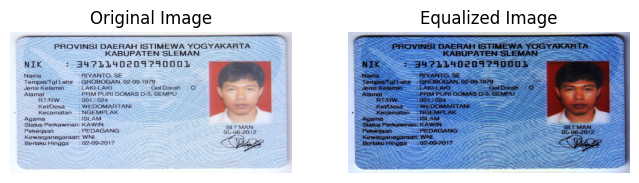

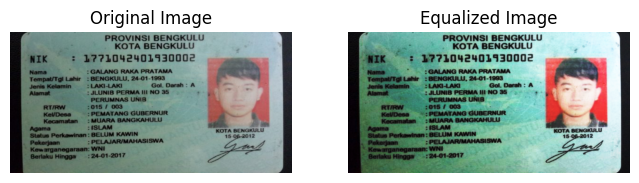

In [35]:
image_directory = 'KTP_More/'

# List image files in the directory
image_files = os.listdir(image_directory)

# Define the target image size
target_size = (800, 400)  # Adjust the size as needed

# Loop through the image files and apply histogram equalization
for image_file in image_files:
    image_path = os.path.join(image_directory, image_file)

    # Load the image
    img = cv2.imread(image_path)

    # Resize the image to the target size
    img = cv2.resize(img, target_size)

    # Calculate the equalized image
    img_array = np.asarray(img)
    histogram_array = np.bincount(img_array.flatten(), minlength=256)
    num_pixels = np.sum(histogram_array)
    histogram_array = histogram_array / num_pixels
    chistogram_array = np.cumsum(histogram_array)
    transform_map = np.floor(255 * chistogram_array).astype(np.uint8)
    img_list = list(img_array.flatten())
    eq_img_list = [transform_map[p] for p in img_list]
    eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
    equalized_img = eq_img_array

    # Display the original and equalized images using matplotlib
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
    plt.title('Equalized Image')
    plt.axis('off')

    plt.show()

### Filtering

In [16]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  return new_image

### Different Filtering Method

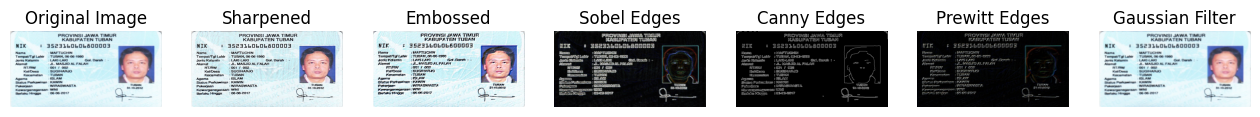

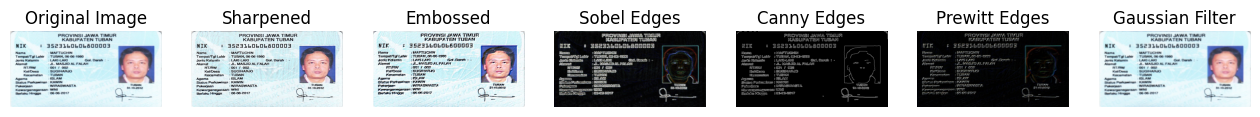

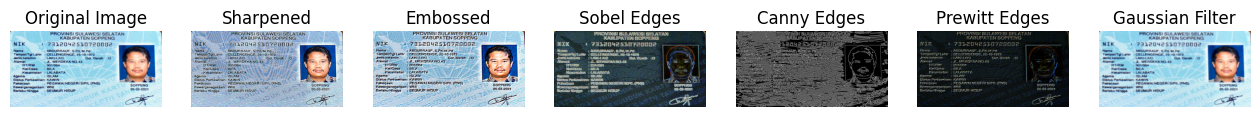

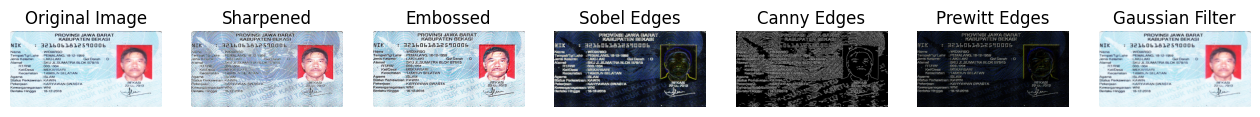

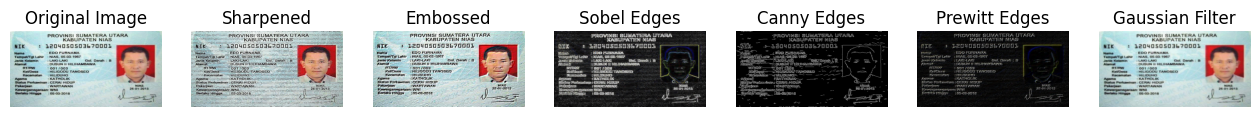

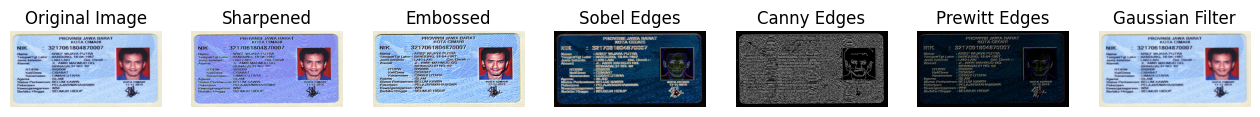

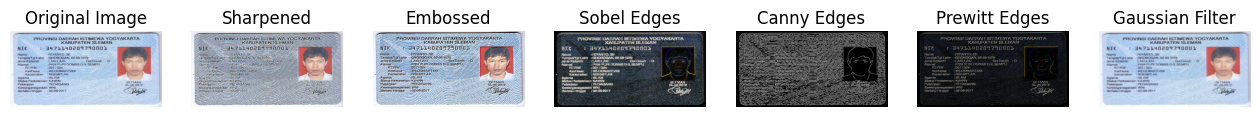

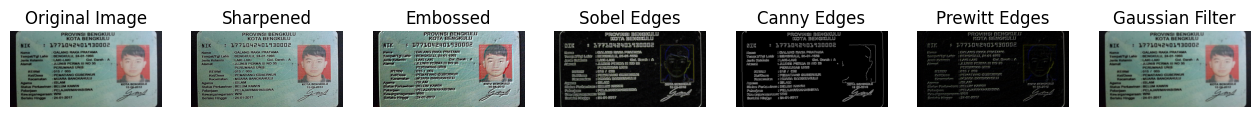

In [33]:
# Define the kernel size for various filters
kernel_size = (5, 5)

# Loop through the image files and apply different filters
for image_file in image_files:
    image_path = os.path.join(image_directory, image_file)

    # Load the image
    img = cv2.imread(image_path)

    # Resize the image to the target size
    img = cv2.resize(img, target_size)

    # Apply sharpening filter
    kernel_sharpen = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])
    sharpened_img = cv2.filter2D(img, -1, kernel_sharpen)

    # Apply embossing filter
    kernel_emboss = np.array([[-2, -1, 0],
                             [-1, 1, 1],
                             [0, 1, 2]])
    embossed_img = cv2.filter2D(img, -1, kernel_emboss)

    # Apply Sobel edge detection
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    sobel_img = cv2.addWeighted(cv2.convertScaleAbs(sobelx), 0.5, cv2.convertScaleAbs(sobely), 0.5, 0)


    # Apply Canny edge detection
    canny_img = cv2.Canny(img, 100, 200)

    # Apply Prewitt edge detection
    kernel_prewitt_x = np.array([[1, 0, -1],
                                [1, 0, -1],
                                [1, 0, -1]])
    kernel_prewitt_y = np.array([[1, 1, 1],
                                [0, 0, 0],
                                [-1, -1, -1]])
    prewitt_x = cv2.filter2D(img, -1, kernel_prewitt_x)
    prewitt_y = cv2.filter2D(img, -1, kernel_prewitt_y)
    prewitt_img = cv2.addWeighted(cv2.convertScaleAbs(prewitt_x), 0.5, cv2.convertScaleAbs(prewitt_y), 0.5, 0)

    # Apply Gaussian filtering
    sigma = 1.5
    gaussian_filtered_img = cv2.GaussianBlur(img, kernel_size, sigma)

    # Display the original and filtered images using matplotlib
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 7, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 7, 2)
    plt.imshow(cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB))
    plt.title('Sharpened')
    plt.axis('off')

    plt.subplot(1, 7, 3)
    plt.imshow(cv2.cvtColor(embossed_img, cv2.COLOR_BGR2RGB))
    plt.title('Embossed')
    plt.axis('off')

    plt.subplot(1, 7, 4)
    plt.imshow(sobel_img, cmap='gray')
    plt.title('Sobel Edges')
    plt.axis('off')

    plt.subplot(1, 7, 5)
    plt.imshow(canny_img, cmap='gray')
    plt.title('Canny Edges')
    plt.axis('off')

    plt.subplot(1, 7, 6)
    plt.imshow(prewitt_img, cmap='gray')
    plt.title('Prewitt Edges')
    plt.axis('off')

    plt.subplot(1, 7, 7)
    plt.imshow(cv2.cvtColor(gaussian_filtered_img, cv2.COLOR_BGR2RGB))
    plt.title('Gaussian Filter')
    plt.axis('off')

    plt.show()